<a href="https://colab.research.google.com/github/Gh0st116/clustering-credit-card/blob/main/clustering_credit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import pandas as pd
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [ ]:
# Download dataset from kaggle
#!pip install opendatasets

#import opendatasets as od

#od.download("https://www.kaggle.com/datasets/arjunbhasin2013/ccdata")

In [ ]:
url = "https://raw.githubusercontent.com/alura-cursos/alura-clustering-validation/base-de-dados/CC%20GENERAL.csv"
data = pd.read_csv(url)
data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [ ]:
# Dropping unnecessary columns
data = data.drop(columns=["CUST_ID", "TENURE"])
data.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0   201.802084        139.509787          0.000000  
1  4103.032597       1072.340217          0.222222  
2   622.066742        627.284787          0.000000  
3     0.000000               NaN          0.000000  
4   678.334763        244.791237          0.000000

In [ ]:
# Getting NaN values in dataset
missing = data.isna().sum()
missing

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [ ]:
# Filling NaN
data.fillna(data.median(), inplace=True)
missing = data.isna().sum()
missing

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

# Preprocessing

In [ ]:
# Normalizing dataset
values = Normalizer().fit_transform(data.values)
values

array([[3.93555441e-02, 7.87271593e-04, 9.17958473e-02, ...,
        1.94178127e-01, 1.34239194e-01, 0.00000000e+00],
       [2.93875903e-01, 8.34231560e-05, 0.00000000e+00, ...,
        3.76516684e-01, 9.84037959e-02, 2.03923046e-05],
       [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
        7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
       ...,
       [2.27733092e-02, 8.11060955e-04, 1.40540698e-01, ...,
        7.90986945e-02, 8.02156174e-02, 2.43318384e-04],
       [2.65257948e-02, 1.64255731e-03, 0.00000000e+00, ...,
        1.03579625e-01, 1.09898221e-01, 4.92767391e-04],
       [1.86406219e-01, 3.33426837e-04, 5.46778061e-01, ...,
        3.15915455e-02, 4.41568390e-02, 0.00000000e+00]])

# Model Fit

In [ ]:
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

# Silhouette coefficient

$
s = \frac{b - a}{max(a, b)}
$
<br><br>
$a$ = average distance between a point and all of its neighbors **in the same cluster**.
<br>
$b$ = average distance between a point and all of the points **in the nearest cluster**.
<br><br>
$s$ should be a value between [-1, 1]. A silhouette of -1 means the clusters aren't compact and separated, and 1 being the best case scenario, where the clusters are very separated from each other.

In [ ]:
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric="euclidean")
print(f"s = {silhouette}")

s = 0.36454479258047573


# Davies-Bouldin index

$
DB = \frac{1}{k} \sum^{k}_{i=j} \underset{i \neq j}{max} R_{ij}
$
<br><br>
$
R_{ij} = \frac{ s_{i} + s_{j} }{ d_{ij} }
$
<br><br>
$R_{ij}$ = metric of similarity between clusters $i$ and $j$;
<br>
$s$ = average distance of all the points to their centroid;
<br>
$d$ = distance between the centroids of two clusters.
<br><br>
A closer value of $DB$ to zero indicates our clusterization is efficient.

In [ ]:
dbs = metrics.davies_bouldin_score(values, labels)
print(f"DB = {dbs}")

DB = 1.0760464906093192


# Calinski-Harabasz index

$
s = \frac{tr(B_{k})}{tr(W_{k})} \times \frac{n_{E} - k}{k - 1}
$
<br><br>
$n_{E}$ = number of elements \\
$B_{k}$ = dispersion between clusters \\
$W_{k}$ = dispersion within a cluster \\
$tr$ = sum of the diagonal of a matrix \\
<br>

$
W_{k} = \sum^{k}_{q=1} \sum_{x \in C_{q}} (x - c_{q})(x - c_{q})^{T}
$
<br><br>
$k$ = number of clusters \\
$q$ = cluster \\

$
\sum_{x \in C_{q}} (x - c_{q})(x - c_{q})^{T}
$ is an estimate of a variance-covariance matrix \\
<br>
$
B_{k} = \sum^{k}_{q = 1} n_{q} (c_{q} - c_{E})(c_{q} - c_{E})^{T}
$
<br><br>
$c_{q}$ = cluster centroid \\
$c_{E}$ = element centroid

In [ ]:
calinski = metrics.calinski_harabasz_score(values, labels)
print(f"s = {calinski}")

s = 3431.790347716921


# Validation

In [ ]:
def clustering_algorythm(n_clusters, dataset):
  kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
  labels = kmeans.fit_predict(dataset)

  # Metrics
  s = metrics.silhouette_score(dataset, labels, metric="euclidean")
  dbs = metrics.davies_bouldin_score(dataset, labels)
  calinski = metrics.calinski_harabasz_score(dataset, labels)

  return s, dbs, calinski

In [ ]:
s1, dbs, calinski = clustering_algorythm(3, values)
print(s1, dbs, calinski)

0.3272203126696238 1.3096073640088426 3526.440519908274


Here our silhouette value and overall metrics are better, so we'll choose to use 5 clusters between the other two

In [ ]:
s2, dbs2, calinski2 = clustering_algorythm(5, values)
print(s2, dbs2, calinski2)

cluster_num = 5;

0.3644635747161945 1.0758620069408935 3431.7956206905983


In [ ]:
s3, dbs3, calinski3 = clustering_algorythm(50, values)
print(s3, dbs3, calinski3)

0.25636030351844075 1.2071104288017453 1616.8227032516545


# Random dataset validation

In [ ]:
data.count()

BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
dtype: int64

In [ ]:
random_data = np.random.rand(8950, 16)
s, dbs, calinski = clustering_algorythm(cluster_num, random_data)

print(s, dbs, calinski)
print(s2, dbs2, calinski2)

0.039209214105179455 3.532791346775973 300.83699900320624
0.3644635747161945 1.0758620069408935 3431.7956206905983


Now with random data, our algorythm is way better in silhouette and calinski, achieving significantly smaller values, but it falls behind on the davies-bouldin metric, with an overall great performance.

# Testing cluster stability

In [ ]:
set1, set2, set3 = np.array_split(values, 3)

s, dbs, calinski = clustering_algorythm(cluster_num, set1)
s2, dbs2, calinski2 = clustering_algorythm(cluster_num, set2)
s3, dbs3, calinski3 = clustering_algorythm(cluster_num, set3)

print(s, dbs, calinski)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.3689633507303375 1.056111437621245 1204.0955477128855
0.35416642754504835 1.1382306445993162 1194.951986504888
0.36685269244474583 1.0988027839846315 1167.5299723518192


# Plotting metrics

Text(0, 0.5, 'Payments')

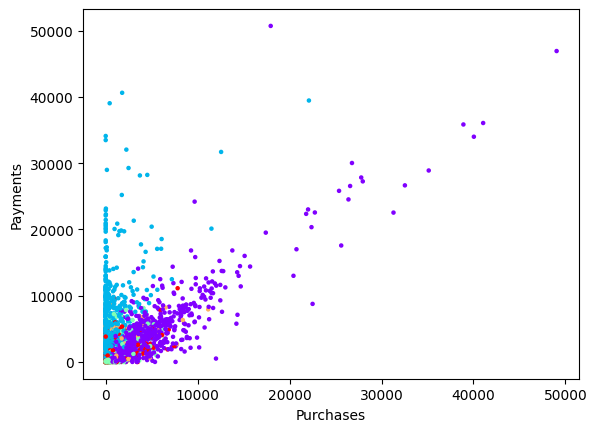

In [ ]:
plt.scatter(data['PURCHASES'], data['PAYMENTS'], c=labels, s=cluster_num, cmap='rainbow')
plt.xlabel("Purchases")
plt.ylabel("Payments")

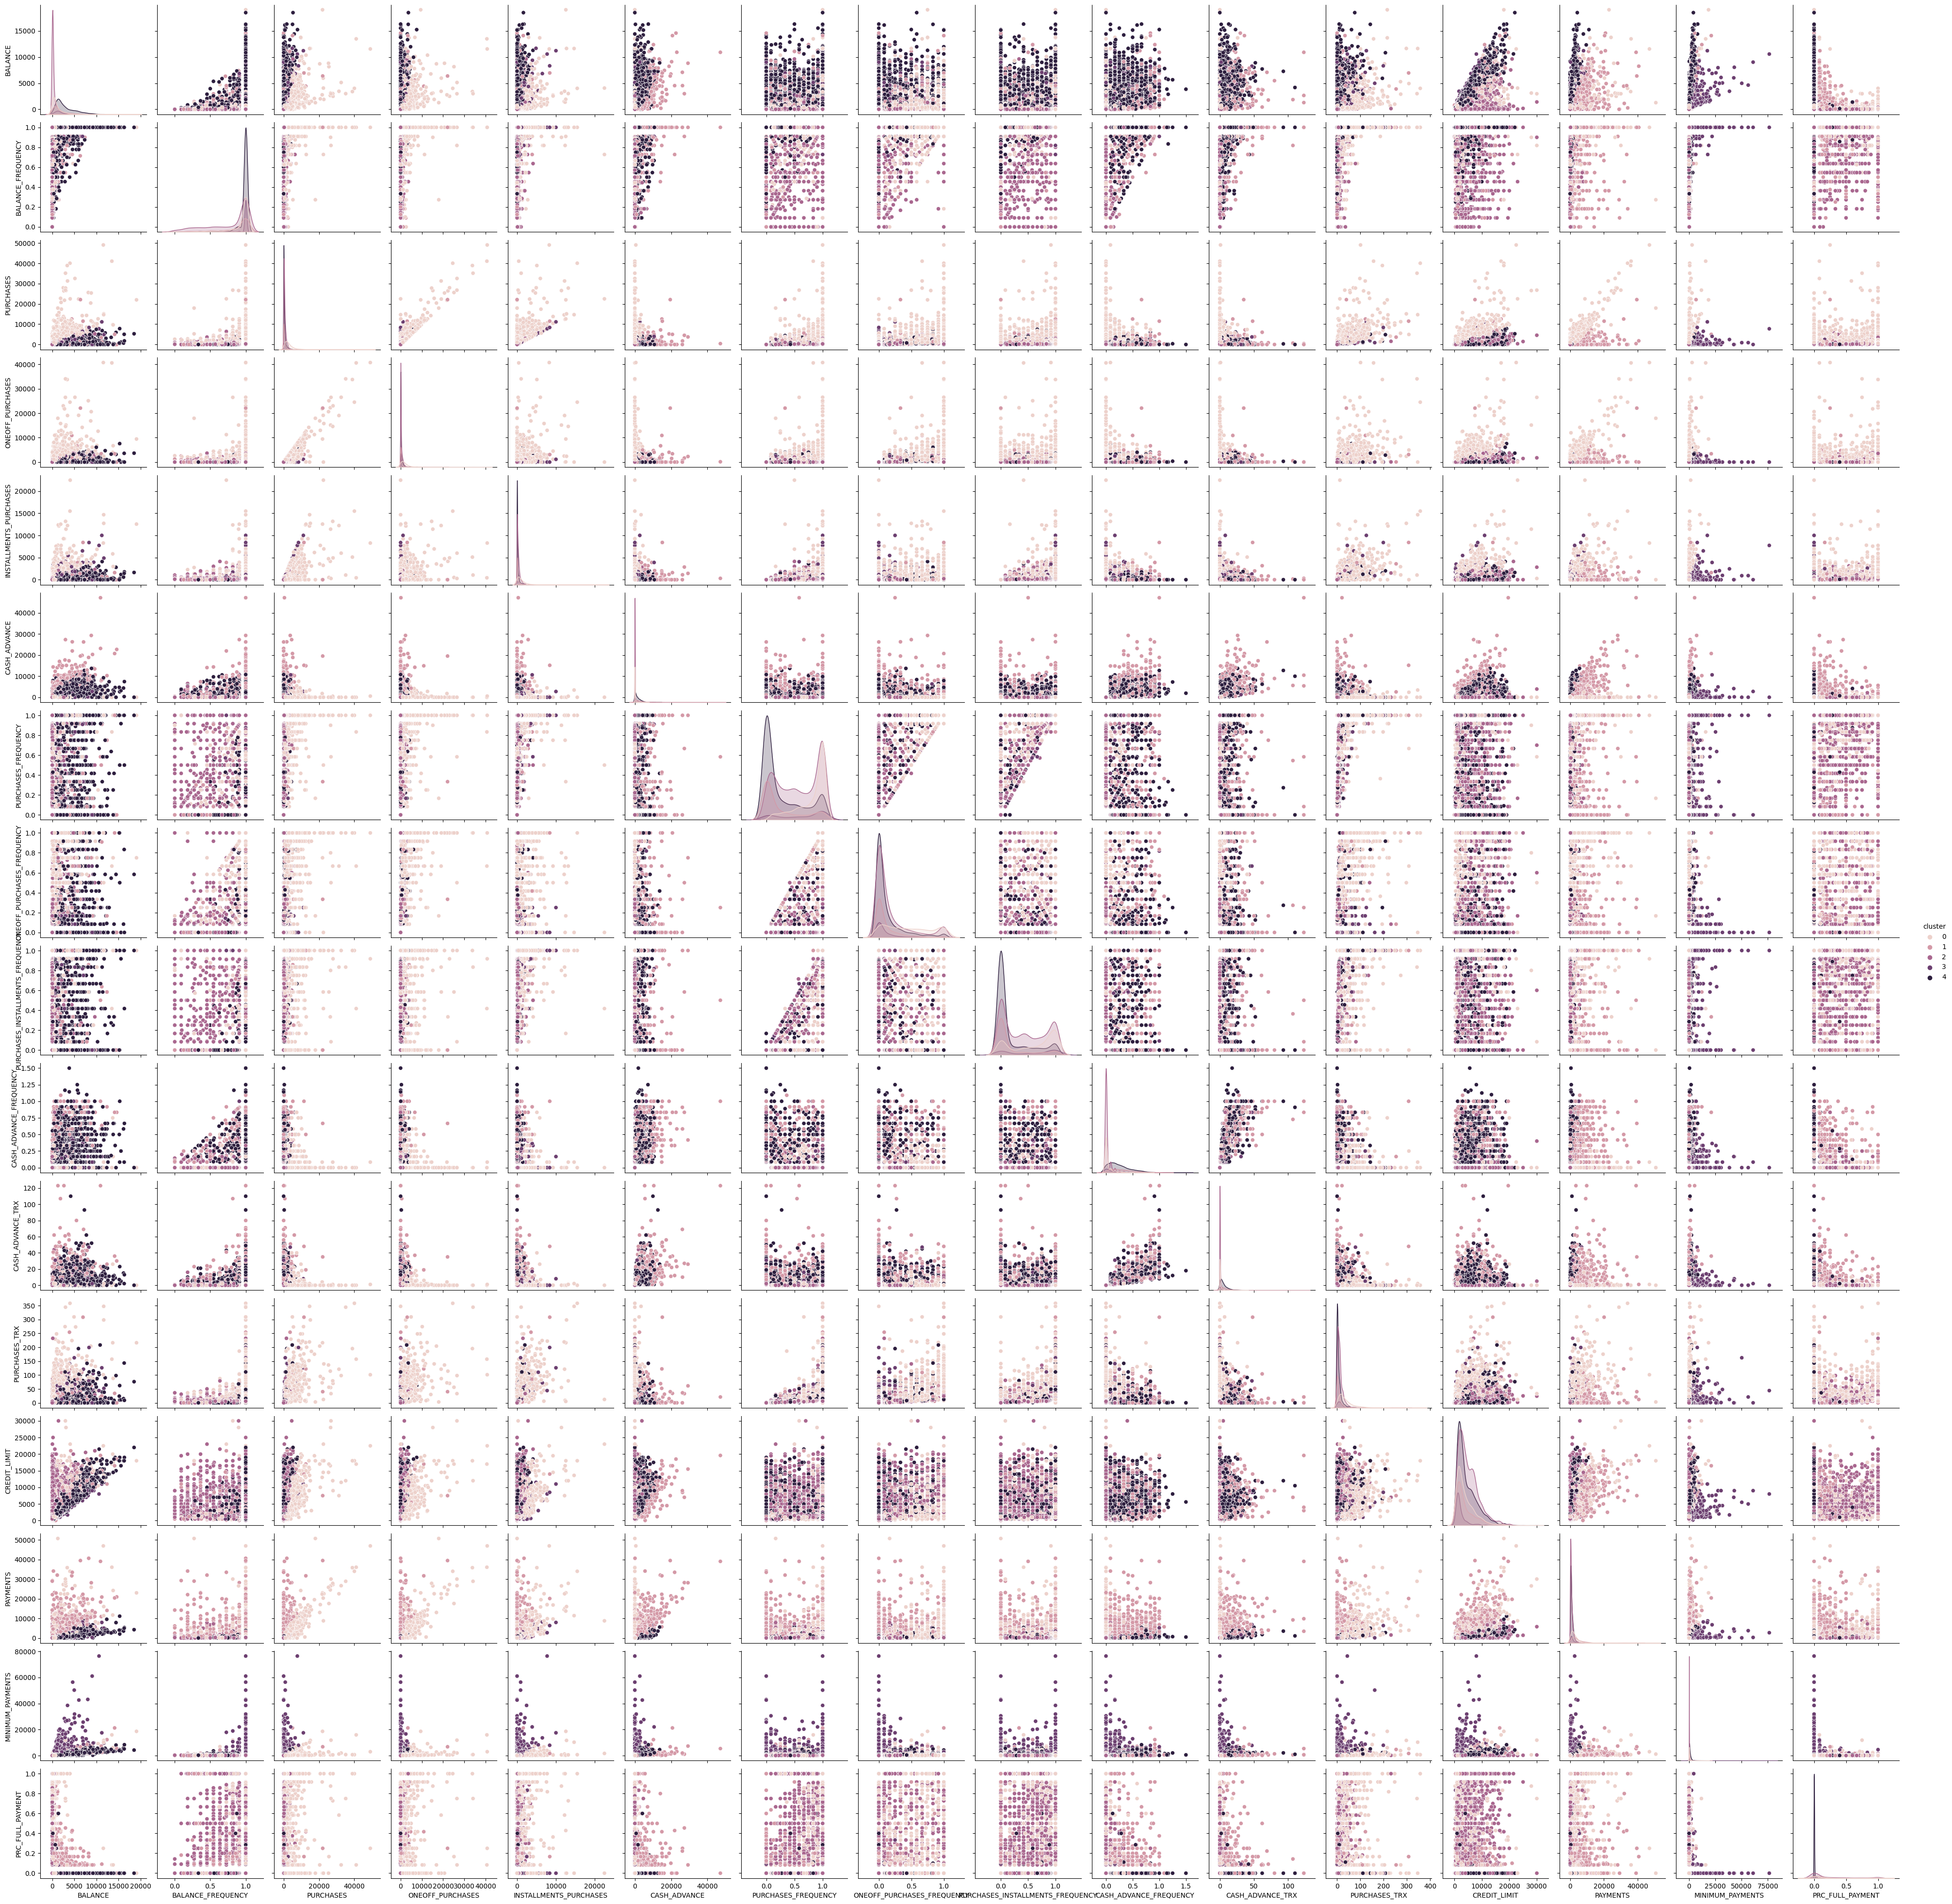

In [ ]:
data["cluster"] = labels
sns.pairplot(data[0:], hue="cluster")

# Cluster Analysis

In [ ]:
data.groupby("cluster").describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        1536.0  1141.865757  1664.809840   0.000000   212.178230   
1        1073.0  1795.328292  1982.485775   0.000000   507.076999   
2        3279.0   443.776995   846.525522   0.000000    23.340435   
3         412.0  1987.146873  1852.215743  70.794108  1020.146724   
4        2650.0  3036.946177  2478.922442   6.824905  1255.154881   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0         554.332740  1370.056708  19043.138560            1536.0  0.928220   
1        1088.056301  2315.003636  14581.459140            1073.0  0.862260   
2          82.902896   410.659944   9630.367575            3279.0  0.774514   
3        1338.918346  2133.415063  11670.179850             412.0  0.989512   
4        2173.994774  4223.858877  18495.558550            2650.0  0.963514   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       523.540210  18621.013310           1536.0  0.278331   
1        ...       884.183626  21235.065300           1073.0  0.117430   
2        ...       248.766884   4483.503862           3279.0  0.246881   
3        ...      7086.774783  76406.207520            412.0  0.019271   
4        ...      1330.541571   8345.641905           2650.0  0.001798   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.367137  0.0  0.0  0.083333  0.545455  1.0  
1        0.186772  0.0  0.0  0.083333  0.142857  1.0  
2        0.346775  0.0  0.0  0.000000  0.444444  1.0  
3        0.090795  0.0  0.0  0.000000  0.000000  1.0  
4        0.023256  0.0  0.0  0.000000  0.000000  0.6  

[5 rows x 128 columns]

In [ ]:
centroids = kmeans.cluster_centers_
centroids

array([[1.60105064e-01, 2.45216495e-04, 4.38561405e-01, 2.57200631e-01,
        1.81532508e-01, 2.58728121e-02, 2.04312848e-04, 8.90625500e-05,
        1.50516286e-04, 9.39341912e-06, 1.69901859e-04, 6.17654349e-03,
        6.03940941e-01, 4.02431241e-01, 8.53054178e-02, 7.19457109e-05],
       [2.35130689e-01, 2.16418717e-04, 6.04525670e-02, 3.44569238e-02,
        2.60008529e-02, 3.99755165e-01, 5.26563547e-05, 2.05235176e-05,
        3.52245850e-05, 6.54254245e-05, 1.57052528e-03, 1.12425758e-03,
        5.35275552e-01, 5.98057989e-01, 1.04294158e-01, 2.77348362e-05],
       [6.89799575e-02, 2.30763006e-04, 1.21587120e-01, 4.79794677e-02,
        7.37079733e-02, 2.40200669e-02, 1.73016299e-04, 3.36944404e-05,
        1.40456777e-04, 7.83464589e-06, 1.22859223e-04, 2.86637386e-03,
        9.43639117e-01, 1.53810130e-01, 5.68564456e-02, 7.61967577e-05],
       [3.33483624e-01, 2.68969713e-04, 1.59146477e-01, 3.61931219e-02,
        1.23336164e-01, 5.80731211e-02, 1.67333390e-04, 2.648

In [ ]:
# Choosing the centroids with the most variance that are the most useful for us
max = len(centroids[0])
for i in range(max):
  print(data.columns.values[i], "\n{:.4f}".format(centroids[:, i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0197
ONEOFF_PURCHASES 
0.0077
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0225
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0280
MINIMUM_PAYMENTS 
0.0541
PRC_FULL_PAYMENT 
0.0000


Clusters that we will use: \\
BALANCE
0.0224 \\
PURCHASES
0.0197 \\
CASH_ADVANCE
0.0225 \\
CREDIT_LIMIT
0.0360 \\
PAYMENTS
0.0280

In [ ]:
description = data.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()

description["n_clients"] = n_clients

description

<ipython-input-39-790c29ed82bd>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = data.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]


BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0        1141.865757  3274.071901    183.496011   4098.802182  3037.137165   
1        1795.328292   476.810531   3267.199032   3982.452201  4713.384730   
2         443.776995   629.282729    140.652097   5130.892579   814.340168   
3        1987.146873   858.326286    420.107194   2226.699029  1338.974045   
4        3036.946177   385.299102   1637.380994   4495.584906   968.775192   

         n_clients  
cluster             
0             1536  
1             1073  
2             3279  
3              412  
4             2650

In [ ]:
data.groupby("cluster")["PRC_FULL_PAYMENT"].describe()

count      mean       std  min  25%       50%       75%  max
cluster                                                               
0        1536.0  0.278331  0.367137  0.0  0.0  0.083333  0.545455  1.0
1        1073.0  0.117430  0.186772  0.0  0.0  0.083333  0.142857  1.0
2        3279.0  0.246881  0.346775  0.0  0.0  0.000000  0.444444  1.0
3         412.0  0.019271  0.090795  0.0  0.0  0.000000  0.000000  1.0
4        2650.0  0.001798  0.023256  0.0  0.0  0.000000  0.000000  0.6

Cluster analysis: \\
C0: Most purchases. Best payers. \\
C1: Most cash advance and payments. Average payers. \\
C2: Least cash advance. Biggest credit limit. Good payers. Biggest number of clients. \\
C3: Least credit limit. Bad payers. Least clients. \\
C4: Great balance. Least purchases. Worst payers. big number of clients.